In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats


In [22]:
Data=pd.read_csv('/home/tejas/Desktop/phish_dataset/NetPhish_V3.csv')
Data.head()


,url_length,num_dots,has_hyphen,has_at_symbol,path_length,query_length,num_params,tld_length,uses_https,url_depth,...,has_hex_chars,file_extension_length,num_underscores,netblock_owner,asn,reverse_dns_present,organisation,dnsssec,is_netblock_trusted,class
0,40.0,2.0,0.0,0.0,16.0,0.0,0.0,3.0,1.0,3.0,...,0.0,0.0,0.0,"Cloudflare, Inc.",13335.0,0.0,0.0,1.0,1,0.0
1,53.0,2.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,1.0,"Vercel, Inc",16509.0,0.0,1.0,1.0,0,1.0
2,75.0,2.0,0.0,0.0,51.0,0.0,0.0,3.0,1.0,2.0,...,0.0,0.0,0.0,Google LLC,396982.0,1.0,0.0,1.0,1,0.0
3,24.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,...,0.0,0.0,0.0,6 COLLYER QUAY,132203.0,0.0,0.0,0.0,0,1.0
4,55.0,2.0,0.0,0.0,9.0,0.0,0.0,3.0,1.0,1.0,...,0.0,0.0,1.0,"Vercel, Inc",16509.0,0.0,1.0,1.0,0,1.0


## Descriptive Analysis 

In [23]:
print("No of Columns:",Data.shape[1], "and Rows:", Data.shape[0])
print("Features:", Data.columns.tolist())

No of Columns: 32 and Rows: 50522
Features: ['url_length', 'num_dots', 'has_hyphen', 'has_at_symbol', 'path_length', 'query_length', 'num_params', 'tld_length', 'uses_https', 'url_depth', 'has_ip', 'domain_length', 'num_subdomains', 'contains_suspicious_word', 'hostname_length', 'has_port', 'num_special_chars', 'is_shortened', 'fragment_length', 'double_slash_pos', 'digit_to_length_ratio', 'num_unique_chars', 'has_hex_chars', 'file_extension_length', 'num_underscores', 'netblock_owner', 'asn', 'reverse_dns_present', 'organisation', 'dnsssec', 'is_netblock_trusted', 'class']


In [24]:
numeric = Data.select_dtypes(include='number').columns.tolist()
categorical = Data.select_dtypes(exclude='number').columns.tolist()


In [25]:
Data[numeric[:len(numeric)//2]].describe()


,url_length,num_dots,has_hyphen,has_at_symbol,path_length,query_length,num_params,tld_length,uses_https,url_depth,has_ip,domain_length,num_subdomains,contains_suspicious_word,hostname_length
count,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.00000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000
mean,66.091307,2.076422,0.267329,0.007284,27.736748,7.826590,0.292368,2.894521,0.793872,1.93678,0.001524,22.424409,0.819465,0.048909,22.417006
std,64.806195,0.977326,0.442570,0.085036,36.048478,54.807265,1.629546,0.983695,0.404528,1.52694,0.039010,10.143861,0.621595,0.215681,10.137175
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,4.000000
25%,38.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,15.000000,0.000000,0.000000,15.000000
50%,52.000000,2.000000,0.000000,0.000000,17.000000,0.000000,0.000000,3.000000,1.000000,2.00000,0.000000,20.000000,1.000000,0.000000,20.000000
75%,78.000000,2.000000,1.000000,0.000000,40.000000,0.000000,0.000000,3.000000,1.000000,3.00000,0.000000,27.000000,1.000000,0.000000,27.000000
max,2014.000000,55.000000,1.000000,1.000000,1043.000000,1973.000000,71.000000,20.000000,1.000000,31.00000,1.000000,88.000000,7.000000,1.000000,88.000000


In [26]:
Data[numeric[len(numeric)//2:]].describe()

,has_port,num_special_chars,is_shortened,fragment_length,double_slash_pos,digit_to_length_ratio,num_unique_chars,has_hex_chars,file_extension_length,num_underscores,reverse_dns_present,organisation,dnsssec,is_netblock_trusted,class
count,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000,50522.000000
mean,0.001267,1.660960,0.042041,0.087150,5.793397,0.067289,24.595800,0.041804,0.995408,0.297791,0.492577,0.646332,0.989193,0.523257,0.500000
std,0.035570,8.838376,0.200685,2.649401,0.404872,0.091627,7.408337,0.200142,4.593749,2.456005,0.499950,0.478112,0.103395,0.499464,0.500005
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,6.000000,0.026316,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,6.000000,0.106667,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,397.000000,1.000000,366.000000,6.000000,0.946086,72.000000,1.000000,361.000000,131.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
Data[categorical].describe()

,netblock_owner,asn
count,50522,50522
unique,3725,2874
top,"Cloudflare, Inc.",13335.0
freq,12434,14094


## Null Values

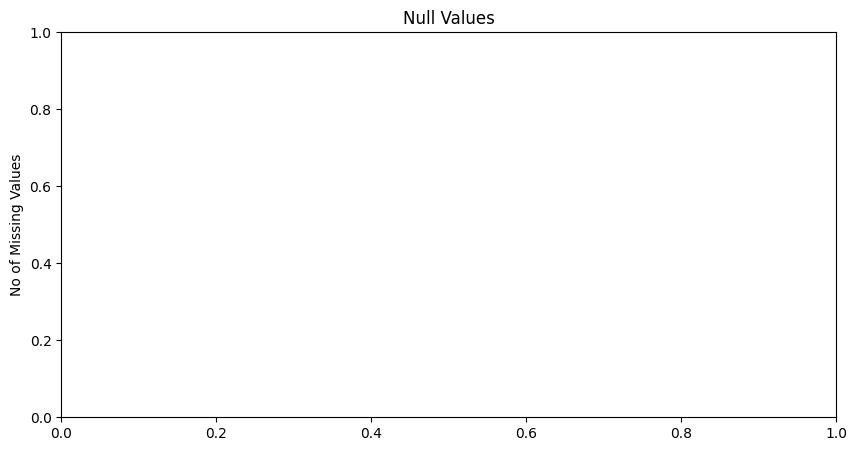

In [28]:
null=Data.isnull().sum()
null_value = null[null > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=null_value.index,y=null_value)
plt.title('Null Values')
plt.ylabel('No of Missing Values')
plt.show()


In [29]:
Data.isnull().sum()

url_length                  0
num_dots                    0
has_hyphen                  0
has_at_symbol               0
path_length                 0
query_length                0
num_params                  0
tld_length                  0
uses_https                  0
url_depth                   0
has_ip                      0
domain_length               0
num_subdomains              0
contains_suspicious_word    0
hostname_length             0
has_port                    0
num_special_chars           0
is_shortened                0
fragment_length             0
double_slash_pos            0
digit_to_length_ratio       0
num_unique_chars            0
has_hex_chars               0
file_extension_length       0
num_underscores             0
netblock_owner              0
asn                         0
reverse_dns_present         0
organisation                0
dnsssec                     0
is_netblock_trusted         0
class                       0
dtype: int64

## Outliers

In [31]:
num_cols = Data.select_dtypes(include=np.number).columns.tolist()
outlier_counts = {}
for col in num_cols:
    if Data[col].nunique() > 10:
        z = np.abs(stats.zscore(Data[col].dropna()))
        outlier_counts[col] = (z > 3).sum()
    
outlier= pd.DataFrame(list(outlier_counts.items()), columns=['Feature name', 'Outlier Count'])
print(outlier.sort_values('Outlier Count', ascending=False))

             Feature name  Outlier Count
5              tld_length           2210
12       num_unique_chars           1011
11  digit_to_length_ratio            861
9       num_special_chars            751
7           domain_length            747
8         hostname_length            731
2             path_length            671
4              num_params            530
0              url_length            479
3            query_length            456
6               url_depth            421
13  file_extension_length            300
1                num_dots            295
14        num_underscores            292
10        fragment_length            142


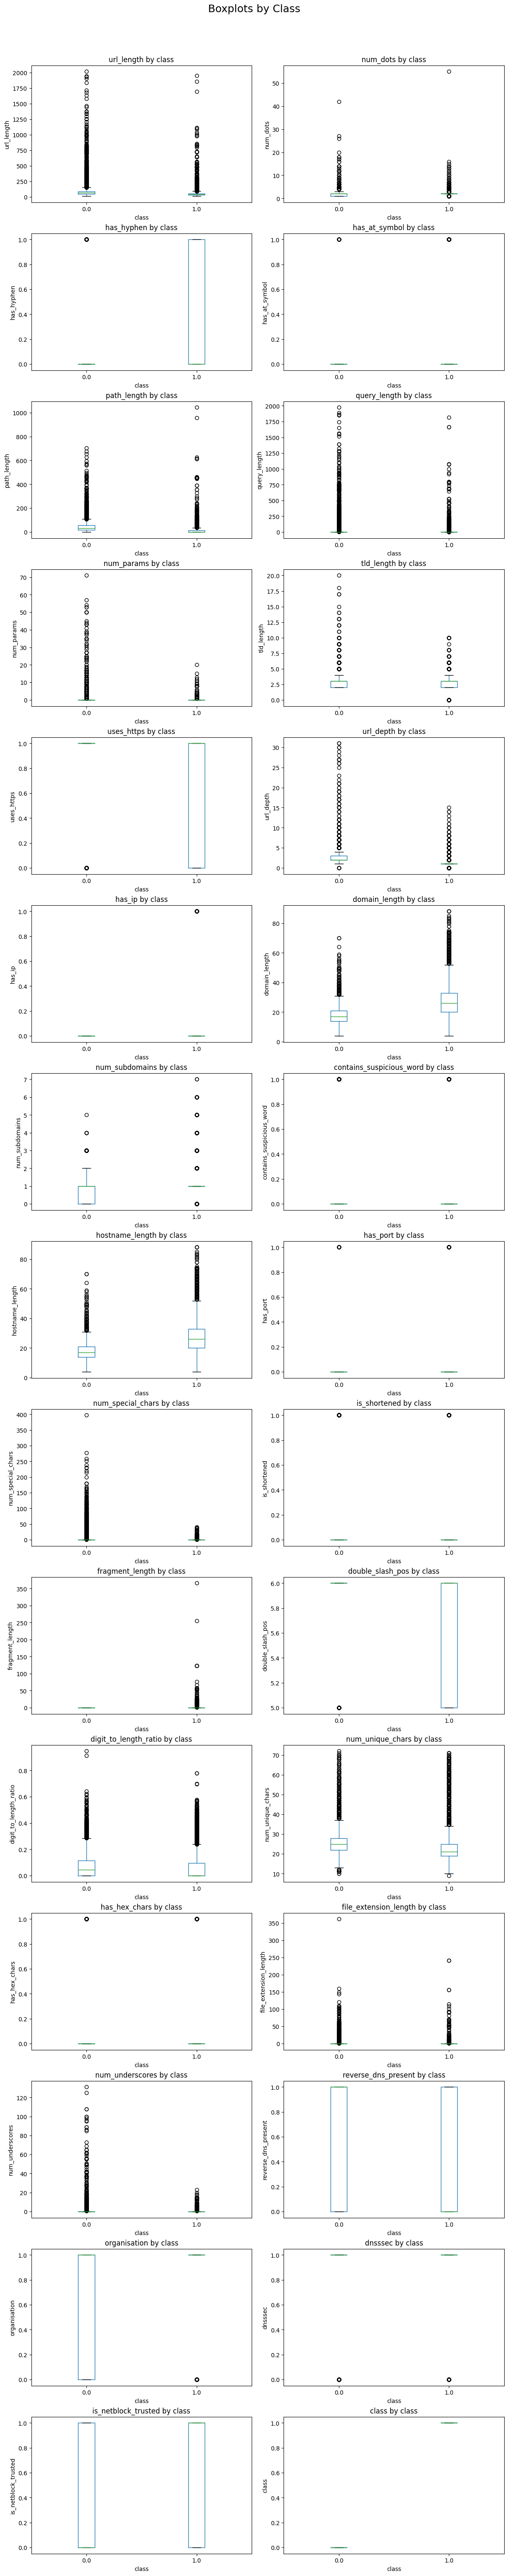

In [32]:
import matplotlib.pyplot as plt
import math

n_cols = 2
n_plots = len(numeric)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows), constrained_layout=True)
for i, col in enumerate(numeric):
    ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols]
    Data.boxplot(column=col, by='class', grid=False, ax=ax)
    ax.set_title(f"{col} by class")
    ax.set_xlabel("class")
    ax.set_ylabel(col)

for j in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle('Boxplots by Class', fontsize=18, y=1.02)
plt.show()


## Correlation 

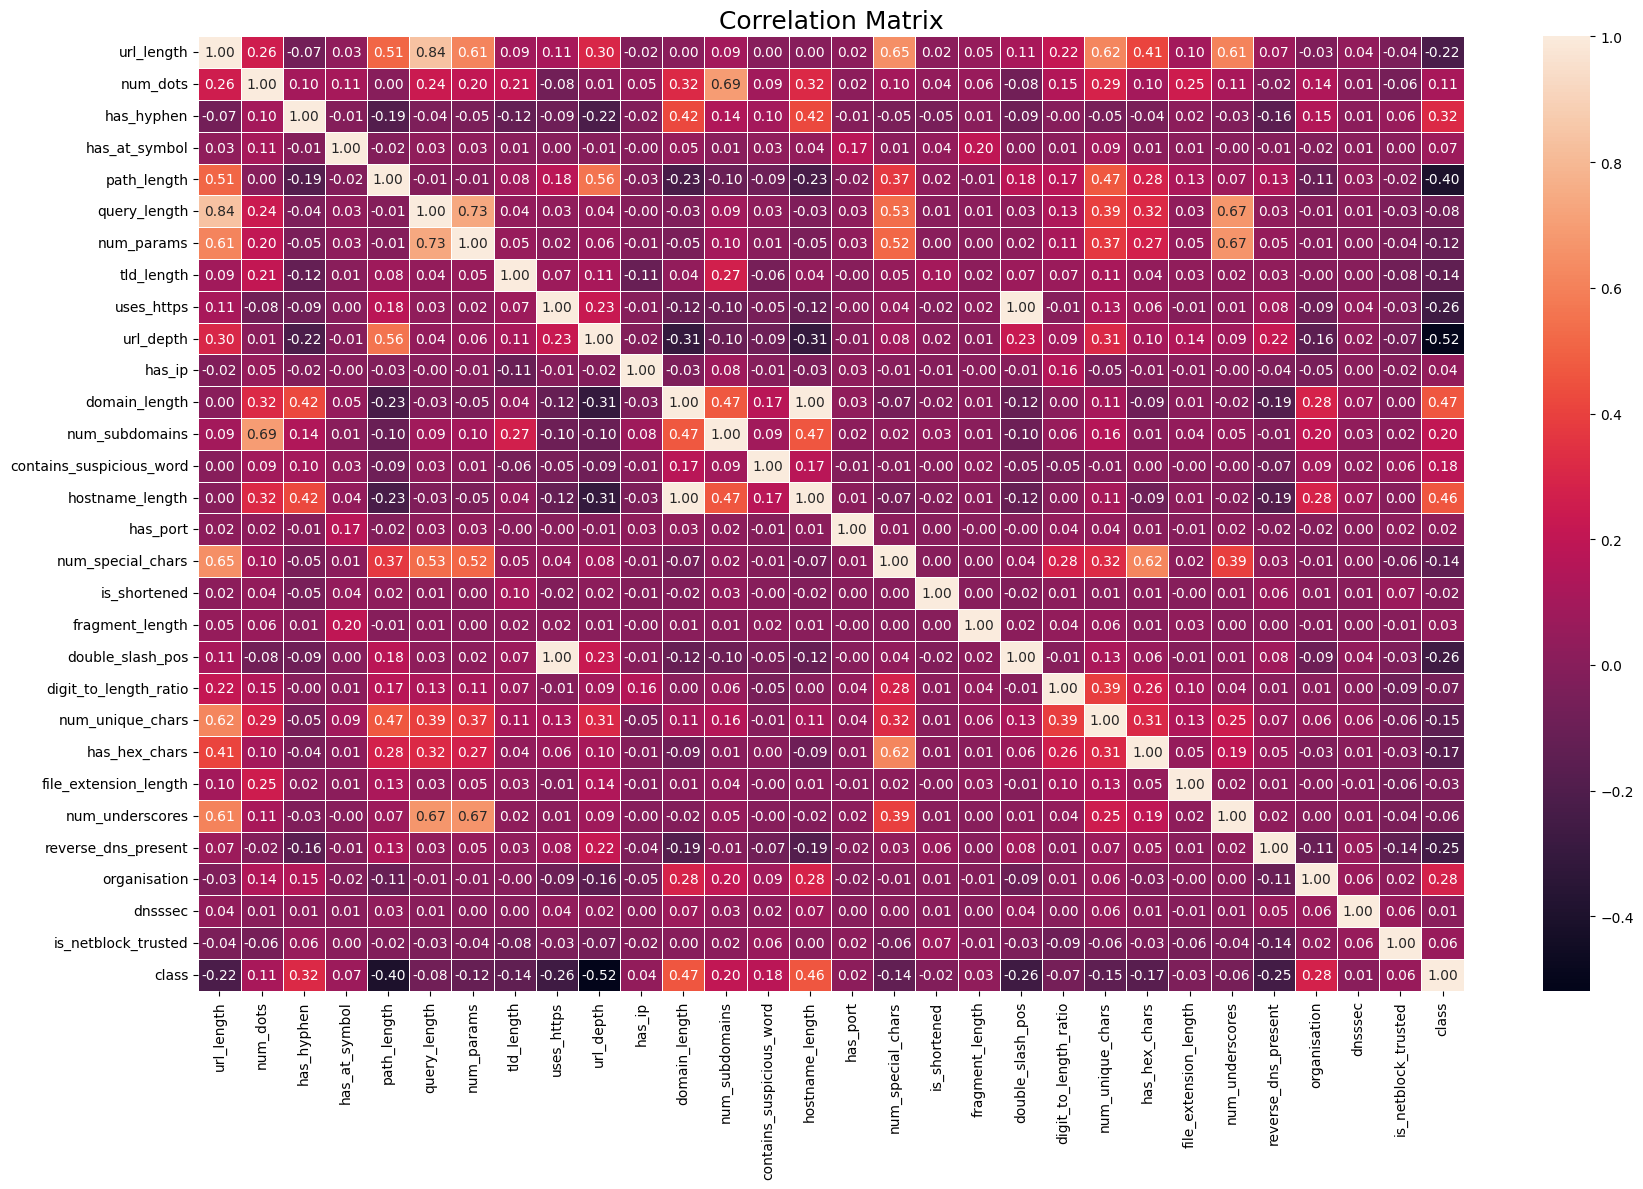

In [33]:

corr = Data[numeric].corr()
plt.figure(figsize=(18, 12))  
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=18)
plt.tight_layout()
plt.show()


In [34]:
corr = Data[numeric].corr()

corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs.index = [tuple(sorted(pair)) for pair in corr_pairs.index]
corr_pairs = corr_pairs[~corr_pairs.index.duplicated(keep='first')]

corr_pairs = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

print("Positive correlation scores:\n")
for (feature1, feature2), score in corr_pairs.items():
    if score > 0:  
        print(f"{feature1:25} {feature2:25} {score:.4f}")


Positive correlation scores:

domain_length             hostname_length           0.9995
double_slash_pos          uses_https                0.9986
query_length              url_length                0.8379
num_params                query_length              0.7333
num_dots                  num_subdomains            0.6928
num_underscores           query_length              0.6684
num_params                num_underscores           0.6672
num_special_chars         url_length                0.6464
has_hex_chars             num_special_chars         0.6195
num_unique_chars          url_length                0.6187
num_params                url_length                0.6106
num_underscores           url_length                0.6054
path_length               url_depth                 0.5571
num_special_chars         query_length              0.5324
num_params                num_special_chars         0.5176
path_length               url_length                0.5108
num_unique_chars          

## Data Imbalance 

Class Feature:
class
0.0    25261
1.0    25261
Name: count, dtype: int64
class
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


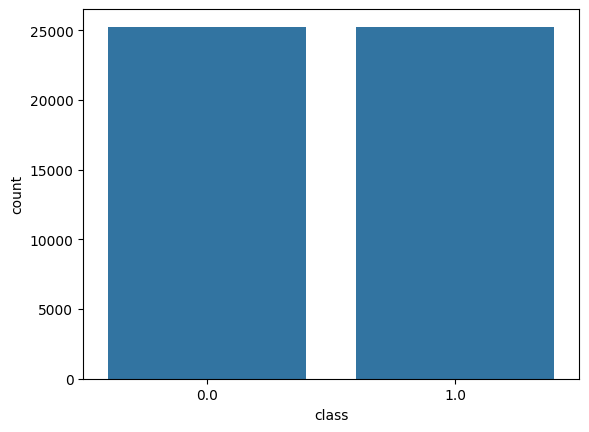

In [39]:
print("Class Feature:")
print(Data['class'].value_counts())
print(Data['class'].value_counts(normalize=True) * 100)
sns.countplot(x='class', data=balanced)
plt.show()

In [37]:
null_counts = Data[Data['netblock_owner'].isnull()]['class'].value_counts()
print(null_counts)




Series([], Name: count, dtype: int64)


In [38]:
Data.isnull().sum()

url_length                  0
num_dots                    0
has_hyphen                  0
has_at_symbol               0
path_length                 0
query_length                0
num_params                  0
tld_length                  0
uses_https                  0
url_depth                   0
has_ip                      0
domain_length               0
num_subdomains              0
contains_suspicious_word    0
hostname_length             0
has_port                    0
num_special_chars           0
is_shortened                0
fragment_length             0
double_slash_pos            0
digit_to_length_ratio       0
num_unique_chars            0
has_hex_chars               0
file_extension_length       0
num_underscores             0
netblock_owner              0
asn                         0
reverse_dns_present         0
organisation                0
dnsssec                     0
is_netblock_trusted         0
class                       0
dtype: int64

In [20]:
phishing = Data[Data['class'] == 1]
legit = Data[(Data['class'] == 0) & (Data['netblock_owner'].notnull())].sample(n=25261, random_state=42)
balanced = pd.concat([phishing, legit], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
balanced = balanced.drop(['domain_age_days', 'site_rank'], axis=1, errors='ignore')
print(balanced['class'].value_counts())



class
0.0    25261
1.0    25261
Name: count, dtype: int64


In [21]:
balanced.to_csv("NetPhish_V3.csv", index=False)
